In [1]:
import numpy as np
import warnings
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import cv2
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,BatchNormalization,Dense
from sklearn.preprocessing import LabelEncoder



warnings.filterwarnings('ignore')

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

class_names = ['keith', 'not_keith']
class_names_labels = {class_name: i for i, class_name in enumerate(class_names)}

keith_path = "C:/cv/keithCNN/keith"
print(os.listdir(keith_path))

['1645636789786.jpg', '30e1a7fc82dea2157f9f8d50c598d61e.jpg', '800-keith-new-barbarians-tour-airport.jpg', 'desktop.ini', 'download (1).jpg', 'download (111).jpg', 'download (112).jpg', 'download (2).jpg', 'download (3).jpg', 'download (4).jpg', 'download.jpg', 'hopefully it works.jpg', 'images (1).jpg', 'images (10).jpg', 'images (11).jpg', 'images (12).jpg', 'images (13).jpg', 'images (14).jpg', 'images (15).jpg', 'images (2).jpg', 'images (3).jpg', 'images (4).jpg', 'images (5).jpg', 'images (6).jpg', 'images (7).jpg', 'images (8).jpg', 'images (9).jpg', 'images.jpg', 'IMG_1515.jpeg', 'IMG_1519.jpeg', 'IMG_1629.jpeg', 'IMG_1995.png', 'IMG_2287.png', 'IMG_7225.JPG', 'IMG_7227.JPG', 'IMG_7232.JPG', 'IMG_7233.JPG', 'IMG_7234.JPG', 'IMG_7242.JPG', 'IMG_7252.JPG', 'keith keith keith.jpg']


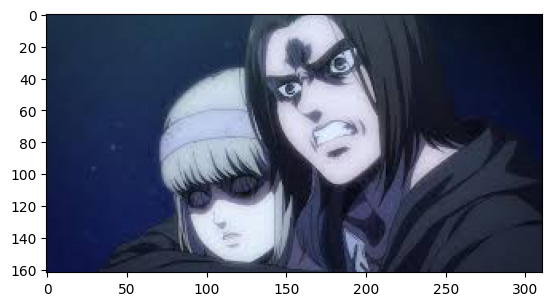

In [2]:
not_keith = Image.open("C:/cv/keithCNN/not_keith/images (3).jpg")
plt.imshow(not_keith)
plt.show()


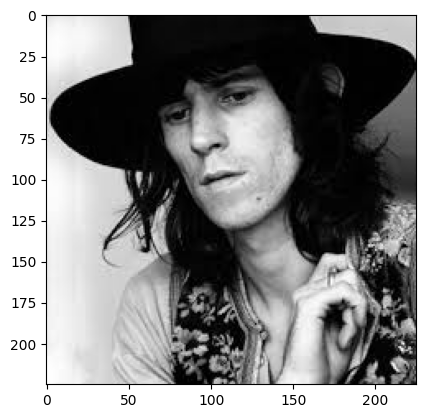

In [3]:

keith_richards = Image.open("C:/cv/keithCNN/keith/images (12).jpg")
plt.imshow(keith_richards)
plt.show()

In [4]:



def display_images(folder_path, label):
    plt.figure(figsize=(20,3))
    for i, filename in enumerate(os.listdir(folder_path)[:5]):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(f'{label}')
        plt.axis('off')
    plt.show()


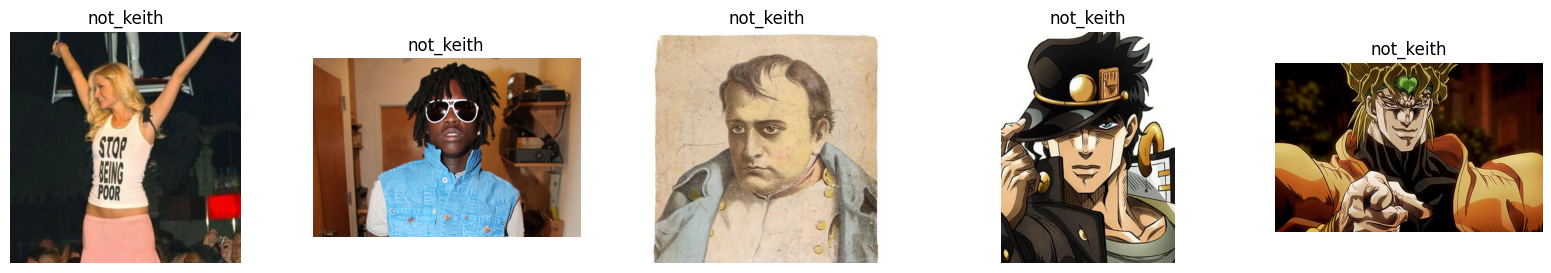

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


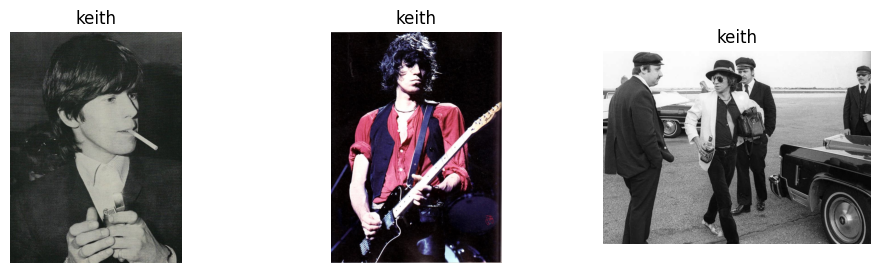

In [5]:
display_images('C:/cv/keithCNN/not_keith', 'not_keith')
display_images('C:/cv/keithCNN/keith', 'keith')



In [7]:

image_size=(120,120)


def load_images(folder_path, label):
    images = []
    labels = []
    for filename in tqdm(os.listdir(folder_path)):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: {folder_path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, image_size)
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)



keith_images, keith_labels = load_images("C:/cv/keithCNN/keith",label='keith')
not_keith_images, not_keith_labels = load_images("C:/cv/keithCNN/not_keith", label='not_keith')


100%|█████████████████████████████████████████████████████████████████████████████████| 41/41 [00:00<00:00, 710.41it/s]


 78%|██████████████████████████████████████████████████████████████▊                  | 31/40 [00:00<00:00, 300.57it/s]

100%|█████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 170.12it/s]


In [8]:
X = np.concatenate([keith_images, not_keith_images], axis=0)
y = np.concatenate([keith_labels, not_keith_labels], axis=0)

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10,random_state=42)

X_train = np.array(X_train,dtype="float32") / 255.0
X_test = np.array(X_test,dtype="float32") / 255.0
X_test.shape,X_train.shape


X_train = X_train.reshape((-1,120,120,3))
X_test = X_test.reshape((-1,120,120,3))

y_train = np.array(y_train)
y_test = np.array(y_test)


CNN = Sequential()
CNN.add(Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(120,120,3)))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(Dropout(0.3))


CNN.add(Conv2D(filters=64,activation='relu',kernel_size=(3,3)))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(Dropout(0.2))

CNN.add(Conv2D(filters=128,activation='relu',kernel_size=(3,3)))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(Dropout(0.1))
CNN.add(Flatten())



CNN.add(Dense(512,activation='relu'))
CNN.add(Dense(2,activation='sigmoid'))
CNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = CNN.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)
loss,acc = CNN.evaluate(X_test,y_test)
pred = CNN.predict(X_test)
loss,acc = CNN.evaluate(X_test,y_test)
print(f'testing loss: {loss:2f}')
print(f'testing accuracy: {acc*100:.2f}%')

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 441ms/step - accuracy: 0.5193 - loss: 17.4818 - val_accuracy: 0.4667 - val_loss: 0.7220
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.5833 - loss: 13.2455 - val_accuracy: 0.6000 - val_loss: 0.8311
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.8065 - loss: 2.9483 - val_accuracy: 0.6000 - val_loss: 1.0158
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.8318 - loss: 1.7033 - val_accuracy: 0.6667 - val_loss: 0.6917
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step - accuracy: 0.9777 - loss: 0.2250 - val_accuracy: 0.6667 - val_loss: 0.7237
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.9330 - loss: 0.3345 - val_accuracy: 0.7333 - val_loss: 0.8521
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - accuracy: 0.9554 - loss: 0.0996 - val_accuracy: 0.6000 - val_loss: 1.8198
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 0.6000 - val_los

In [9]:
y_pred = np.argmax(pred,axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

       keith       1.00      0.57      0.73         7
   not_keith       0.25      1.00      0.40         1

    accuracy                           0.62         8
   macro avg       0.62      0.79      0.56         8
weighted avg       0.91      0.62      0.69         8



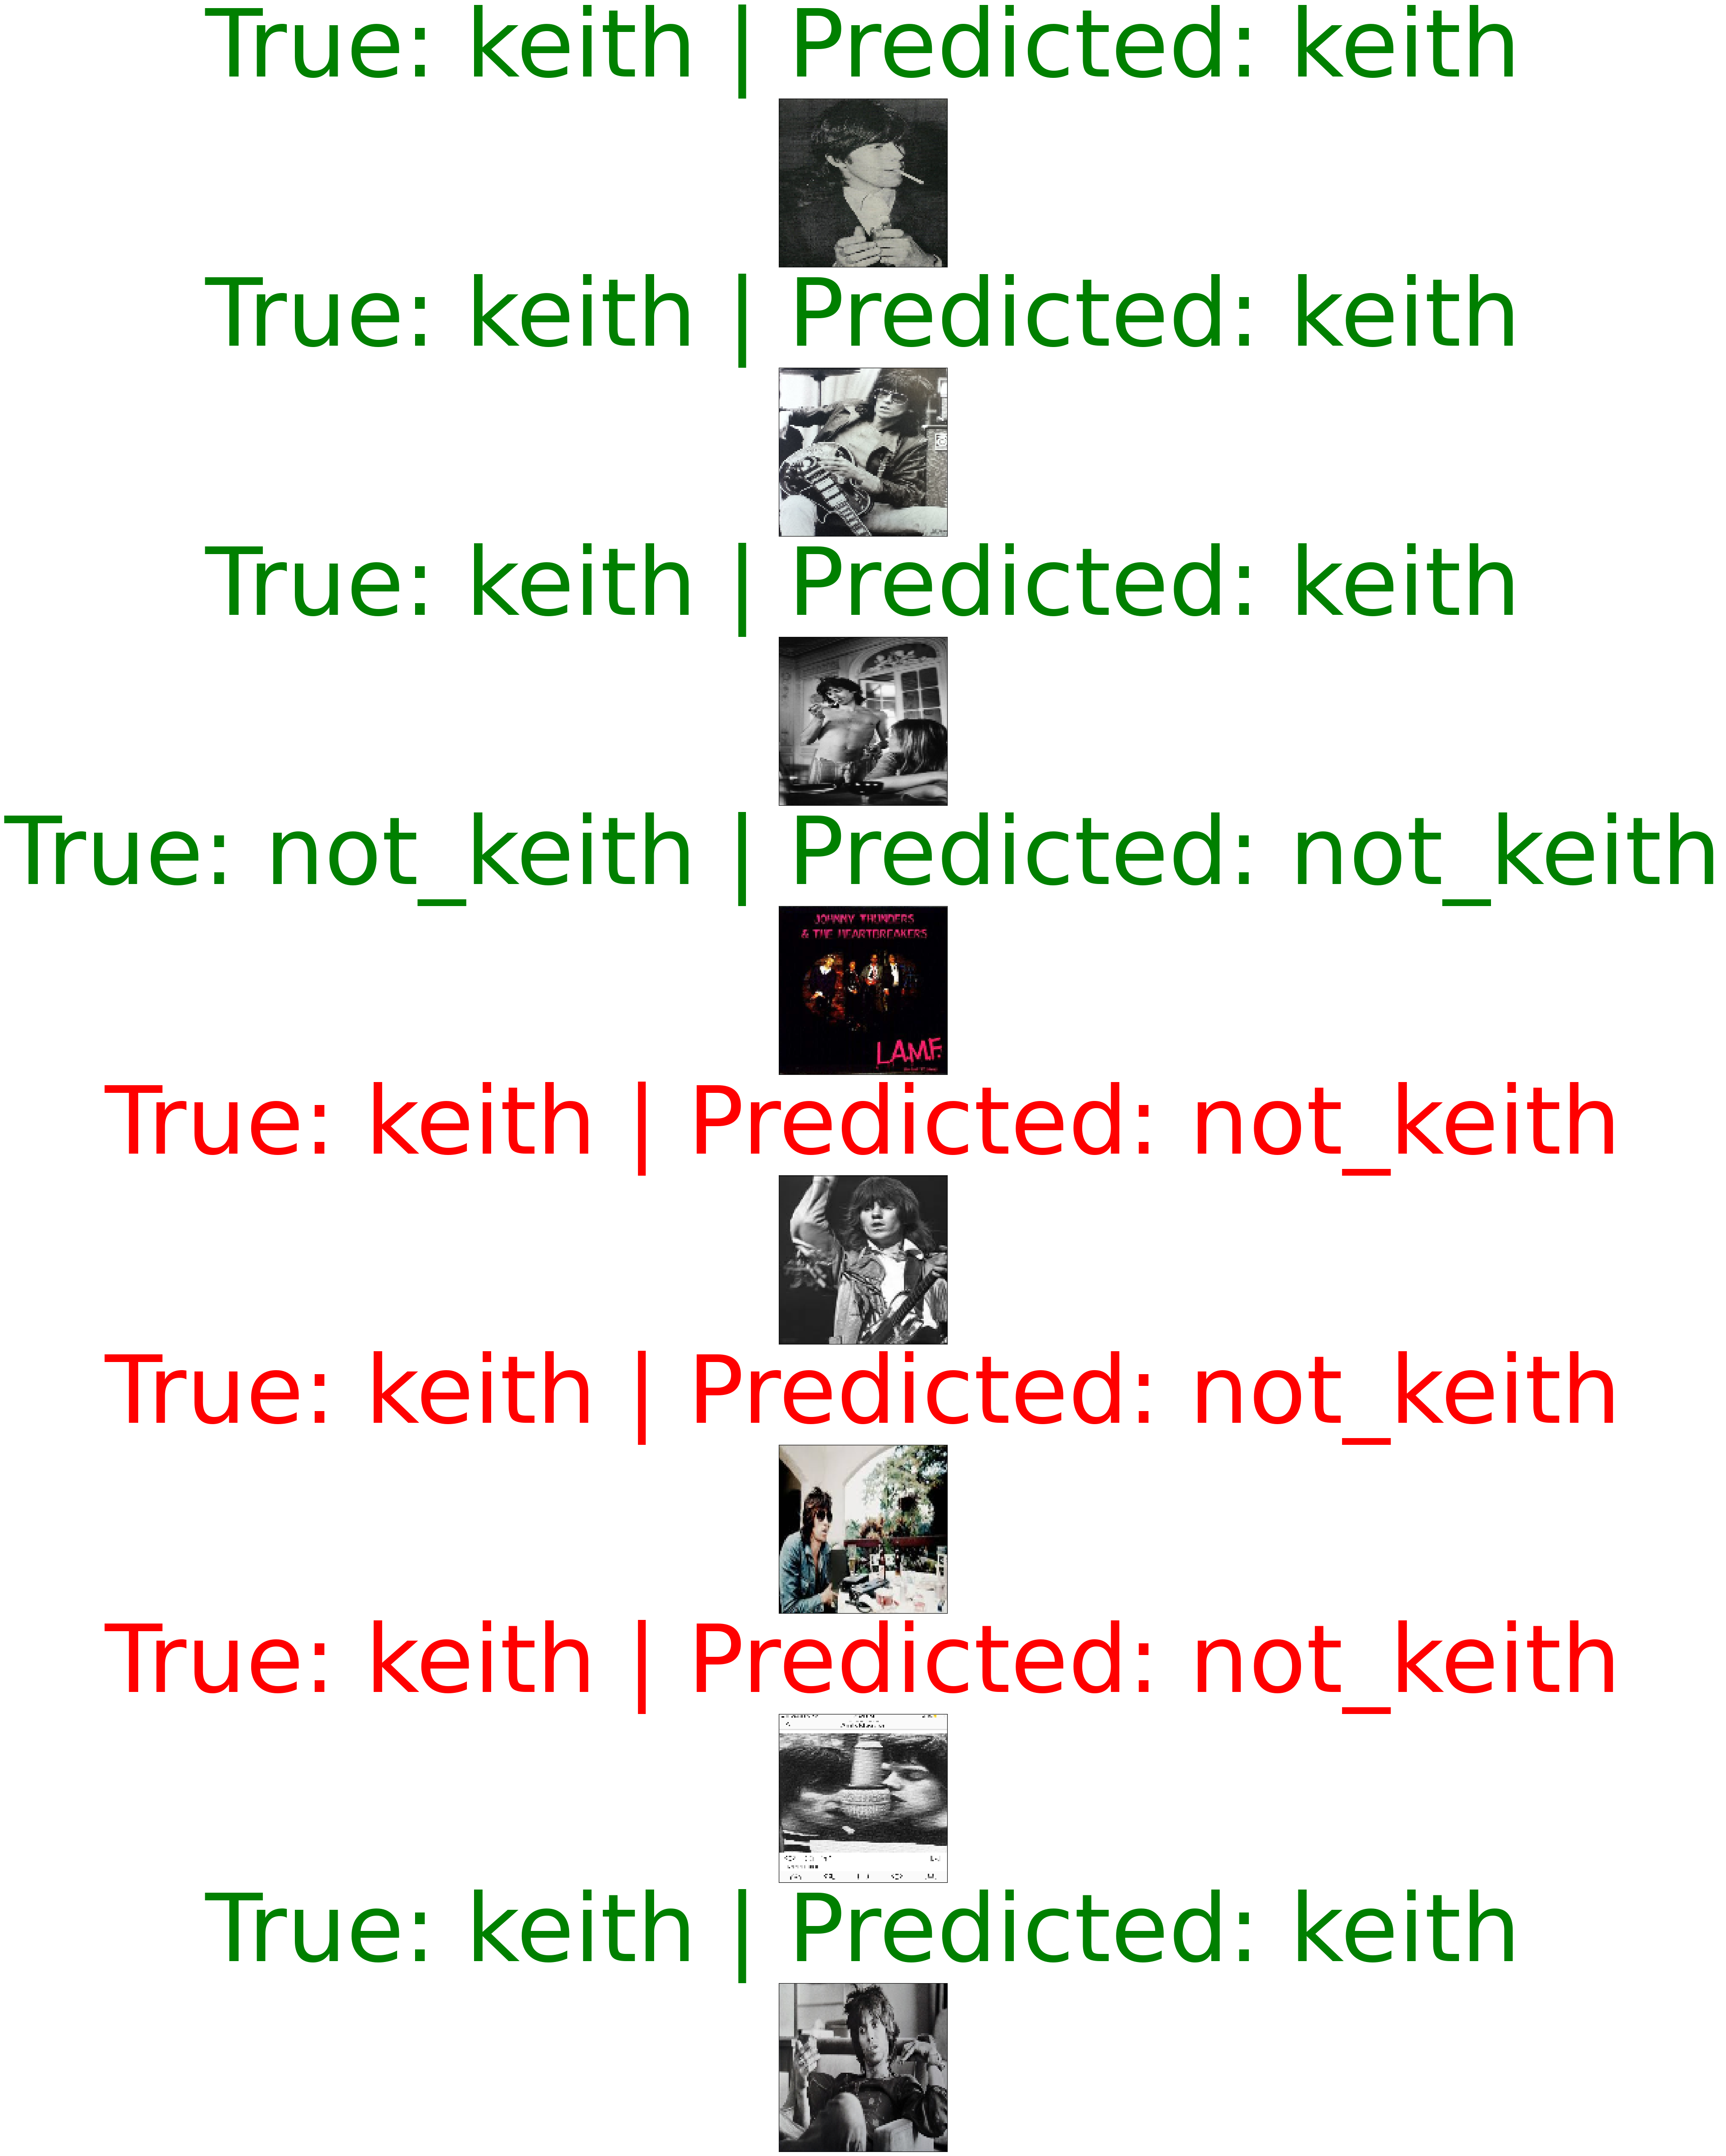

In [10]:
rand_indices = np.random.choice(len(X_test), size=min(150, len(X_test)), replace=False)
plt.figure(figsize=(15, 6 * len(rand_indices)))
for i, index in enumerate(rand_indices):
    plt.subplot(len(rand_indices), 1, i + 1)
    plt.imshow(X_test[index])
    plt.xticks([])
    plt.yticks([])
    predicted_class = class_names[int(y_pred[index])]
    true_class = class_names[int(y_test[index])]
    color = 'green' if predicted_class == true_class else 'red'
    plt.title(f'True: {true_class} | Predicted: {predicted_class}', color=color, fontsize=150)
    plt.tight_layout()
plt.show()
